<a href="https://colab.research.google.com/github/julianafalves/Sinais-Digitais/blob/main/Projeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3º Trabalho - Processamento de Sinais Digitais

### Número do Grupo : G04
* Italo Carvalho Vianelli Ribeiro (RA: 769687)
* João Gabriel Viana Hirasawa (RA: 759055)
* Juliana Ferreira Alves (RA: 744794)"

In [ ]:
!pip install scikit_dsp_comm

     |████████████████████████████████| 90 kB 4.6 MB/s 


In [ ]:
import sk_dsp_comm.sigsys as ss
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *

### a)

In [ ]:
def conv1(x, h):
  M = len(h)
  L = len(x) 

  y = np.zeros(L + M - 1)

  for n in range(len(y)):
    soma = 0
    teto = min(n, M)
    chao = max(0, n - L + 1)
    for m in range(chao, teto + 1):
      try:
        soma += h[m] * x[n - m]
      except:
        pass
    y[n] = soma

  return y

In [ ]:
# Definição dos sinais x1 e h1
x1 = [1, 2, -3, 2, 1, 1]
h1 = [1, 2, -3]

# Definição dos sinais x2 e h2
x2 = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0]
h2 = [1, 4, 10, 16, 19, 16, 10, 4, 1]

conv_x1_h1 = np.convolve(x1,h1)
conv_x2_h2 = np.convolve(x2,h2)

conv_x1_h1_nosso = conv1(x1,h1)
conv_x2_h2_nosso = conv1(x2,h2)

print(conv_x1_h1)
print(conv_x1_h1_nosso, '\n\n')
print(conv_x2_h2)
print(conv_x2_h2_nosso)

[  1   4  -2 -10  14  -3  -1  -3]
[  1.   4.  -2. -10.  14.  -3.  -1.  -3.] 


[  0   0   0   0   1   5  15  31  49  61  61  49  30  10 -10 -30 -49 -61
 -61 -49 -31 -15  -5  -1   0   0   0   0]
[  0.   0.   0.   0.   1.   5.  15.  31.  49.  61.  61.  49.  30.  10.
 -10. -30. -49. -61. -61. -49. -31. -15.  -5.  -1.   0.   0.   0.   0.]


### b)

In [ ]:
def geraOnda(L = 200, K = 50):
  x = np.zeros(L)
  for n in range(L):
    if n%K < K/2:
      x[n] = 1
    else:
      x[n] = 0
  return x

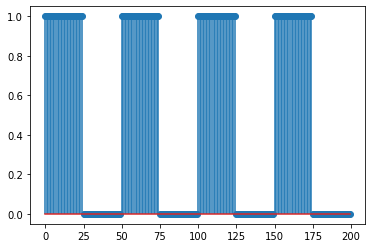

In [ ]:
x = geraOnda()
stem(x, use_line_collection=True)
show()

### c)

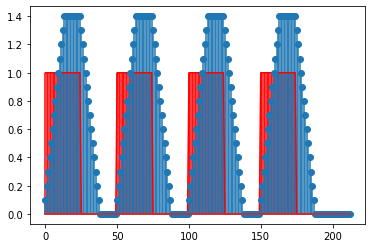

In [ ]:
h = np.repeat(0.1, 14)
stem(x, use_line_collection=True, linefmt='r', markerfmt='r')
stem(conv1(x, h), use_line_collection=True)
show()


### d)

<StemContainer object of 3 artists>

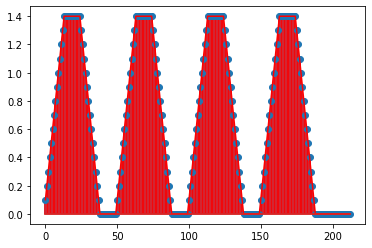

In [ ]:
stem(conv1(x, h), use_line_collection=True)
stem(np.convolve(x, h), use_line_collection=True, linefmt='r', markerfmt='r')

### e)

In [ ]:
def nextpow2(x):
    '''Retorna o expoente da menor potência de 2 maior do que x.'''
    return 1 if x == 0 else (x - 1).bit_length()

def conv2(x, h):
  x, h = list(x), list(h)
  nx = len(x)
  nh = len(h)
  nfft = 2**nextpow2(nx+nh-1)
  xzp = x + [0] * (nfft-nx)
  hzp = h + [0] * (nfft-nh)
  X = np.fft.fft(xzp)
  H = np.fft.fft(hzp)
  Y = X * H    # Multiplicação dos termos
  y = np.real(np.fft.ifft(Y))    # Transformada inversa de Fourier
  yt = y[:nx+nh-1]
  return yt

### f) Explicar aqui

<StemContainer object of 3 artists>

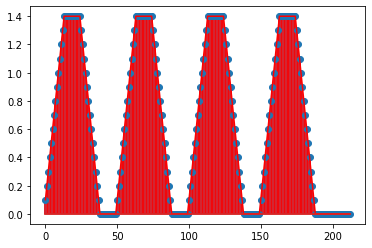

In [ ]:
stem(conv2(x, h), use_line_collection=True)
stem(np.convolve(x, h), use_line_collection=True, linefmt='r', markerfmt='r')

### **g)**

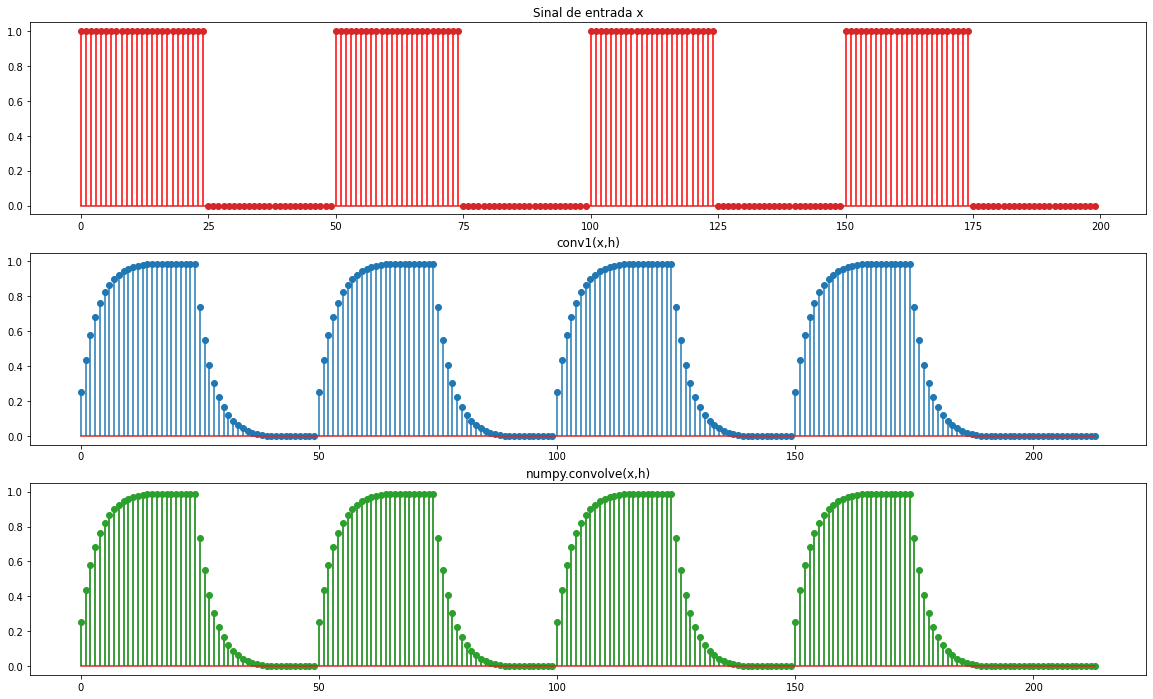

In [ ]:
h = [0.25 * 0.75**n for n in range(15)]

fig, axs = plt.subplots(3,1, sharey=True, figsize = (20.0, 12.0))

axs[0].stem(x, use_line_collection=True, linefmt='r', markerfmt='C3o')
axs[0].set_title('Sinal de entrada x')

axs[1].stem(conv1(x, h), use_line_collection=True)
axs[1].set_title('conv1(x,h)')

axs[2].stem(np.convolve(x, h), use_line_collection=True,linefmt='g',markerfmt= 'C2o')
axs[2].set_title('numpy.convolve(x,h)')

show()

### **i)**

Neste tópico criou-se um filtro com resposta ao impuso finita $h_n$, para $0 \le n \le 24$, tendo cmo sinal de entrada $x(n)$. Sendo que:

 $h_n =(0, 95)^n$
 
 $x(n)=δ(n)+ 2δ(n − 40) + 2δ(n − 70) + δ(n − 80)$

 Desta forma o sinal de entrada é composto por 4 impulsos com intesidades variando entre 1 e 2 (valores que acompanham δ). Já $h_n$ é um sinal que decai suavemente ao longo do tempo.

In [ ]:
h = [0.95 ** n for n in range(25)]
n = np.arange(0, 120 + 1)
x = ss.dimpulse(n) + 2*ss.dimpulse(n - 40) + 2*ss.dimpulse(n - 70) + ss.dimpulse(n - 80)

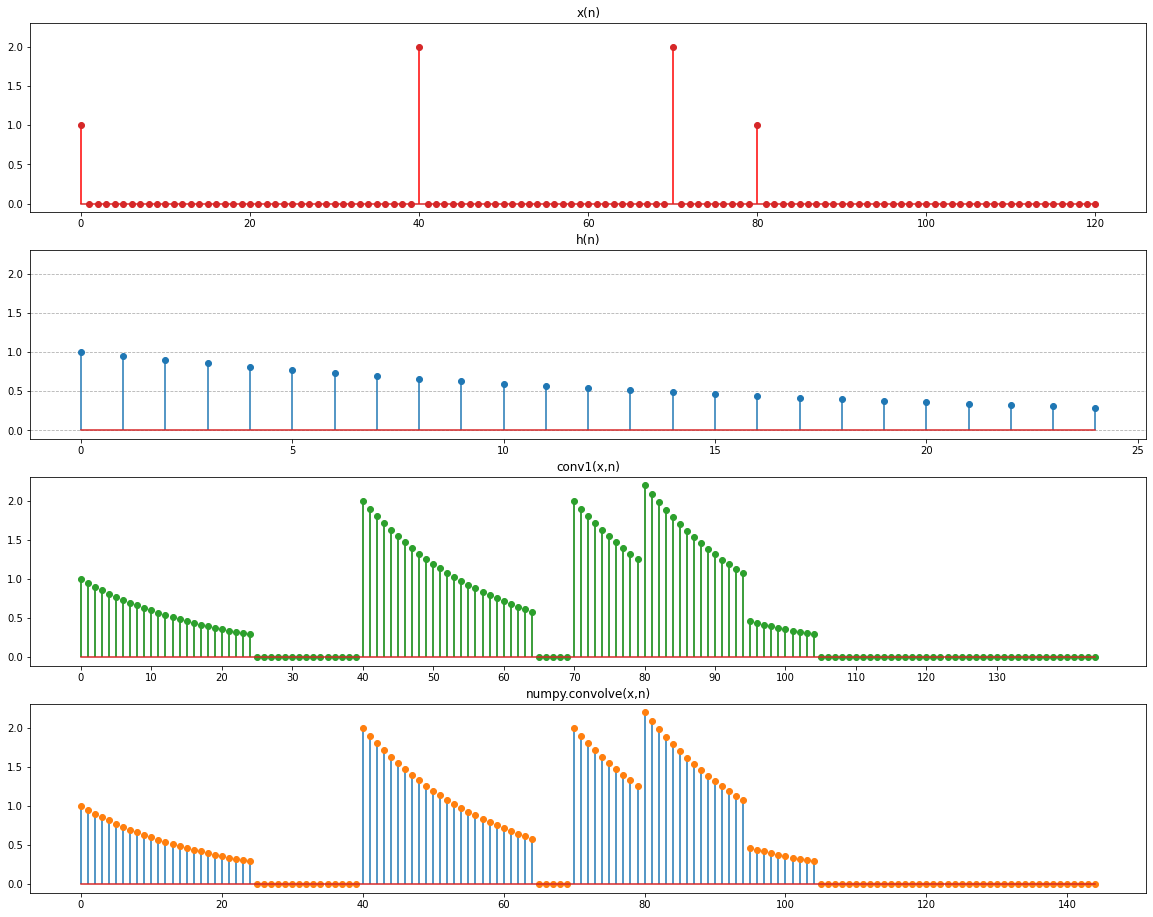

In [ ]:

fig, axs = plt.subplots(4,1, sharey=True, figsize = (20.0, 16.0))

axs[0].stem(x, use_line_collection=True, linefmt='r', markerfmt='C3o')
axs[0].set_title('x(n)')

axs[1].stem(h, use_line_collection=True)
axs[1].set_title('h(n)')
axs[1].grid(axis='y', linestyle='--')

axs[2].stem(conv1(x, h), use_line_collection=True, linefmt='g', markerfmt='C2o')
axs[2].set_title('conv1(x,n)')
axs[2].set_xticks(range(0,140,10))

axs[3].stem(np.convolve(x, h), use_line_collection=True, linefmt='o', markerfmt='C1o')
axs[3].set_title('numpy.convolve(x,n)')


show()